# Taylor Concert Tours Case Study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("8. Taylor Concert.csv", encoding='latin1')
df.head()
df.tail()
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   City                                   445 non-null    object
 1   Country                                445 non-null    object
 2   Venue                                  445 non-null    object
 3   Opening act(s)                         444 non-null    object
 4   Attendance (tickets sold / available)  442 non-null    object
 5   Revenue                                442 non-null    object
 6   Tour                                   445 non-null    object
dtypes: object(7)
memory usage: 24.5+ KB
None


,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour
...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX\r\nBroods,"72,805 / 72,805","$7,686,564",Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX\r\nBroods,"43,907 / 43,907","$4,338,127",Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX\r\nBroods,"35,749 / 35,749","$3,617,593",Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour


# Data Cleaning

In [5]:
new_col = {
    'City':'City',                                    
    'Country':'Country',                                   
    'Venue':'Venue',                                    
    'Opening act(s)':'Opening_act',                           
    'Attendance (tickets sold / available)':'Tickets_sold_and_available',    
    'Revenue':'Revenue',                               
    'Tour':'Tour',             
}
df = df.rename(columns=new_col)
df.sample(4).T

,124,53,251,341
City,Madrid,Grand Rapids,Denver,Seattle
Country,Spain,United States,United States,United States
Venue,Palacio de los Deportes,Van Andel Arena,Pepsi Center,CenturyLink Field
Opening_act,The Bright,Gloriana\r\nKellie Pickler,Ed Sheeran\r\nJoel Crouse,Vance Joy\r\nShawn Mendes
Tickets_sold_and_available,"3,962 / 3,962",,"13,489 / 13,489","55,711 / 55,711"
Revenue,"$251,864",,"$1,076,069","$6,050,643"
Tour,Speak_Now_World_Tour,Fearless_Tour,The_Red_Tour,The_1989_World_Tour


In [6]:
df['Opening_act'] = (
    df['Opening_act']
    .str.replace(r'[—]', 'Unknown', regex=True)  # Handle multiple special chars
    .fillna('Unknown')           
    .str.strip()                 
    .replace(r'^\\s*$', 'Unknown', regex=True)  
    .replace('nan', 'Unknown')   # Handle string 'nan'
)

In [7]:
df['Tickets_sold_and_available'] = df['Tickets_sold_and_available'].replace(['', '—', ''], np.nan)

# Extract and convert numbers
ticket_data = (
    df['Tickets_sold_and_available']
    .str.extract(r'([\d,]+)\s*/\s*([\d,]+)')
    .replace(',', '', regex=True)
    .astype('Int32')  # Use Int32 instead of float
)

df[['tickets_sold', 'tickets_available']] = ticket_data

In [8]:
df['tickets_sold'] = pd.to_numeric(df['tickets_sold'], errors='coerce')
df['tickets_available'] = pd.to_numeric(df['tickets_available'], errors='coerce')

# Then calculate percentage only for valid rows
df['pct_sold'] = (
    (df['tickets_sold'] / df['tickets_available']) * 100
).round(1)

In [9]:
df['Revenue'] = (
    df['Revenue']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Keep digits and decimal points
    .replace(['', 'nan'], np.nan)
    .astype(float)  # Keep as float to preserve any decimal values
)

In [10]:
tour_years = {
    'Fearless_Tour': 2009,
    'Speak_Now_World_Tour': 2011,
    'The_Red_Tour': 2013,
    'The_1989_World_Tour': 2015,
    'Reputation_Stadium_Tour': 2018
}
df['tour_year'] = df['Tour'].map(tour_years)

In [11]:
df['Country'] = df['Country'].replace({
    'USA': 'United States',
    'America': 'United States',
    'The Bahamas': 'Bahamas'})

In [12]:
df['Venue'] = df['Venue'].str.strip()

In [13]:
dtypes = {
    'tour_year': 'Int32',
    'tickets_sold': 'Int32',
    'tickets_available': 'Int32',
    'Revenue': 'float64'  # Keep as float to preserve precision
}
df = df.astype(dtypes)

In [14]:
df = df[
    (df['tickets_sold'].notna()) & 
    (df['tickets_available'].notna()) &
    (df['Revenue'].notna()) &
    (df['tickets_sold'] > 0) &
    (df['tickets_available'] > 0)
]

In [15]:
df['revenue_per_ticket'] = df['Revenue'] / df['tickets_sold']

In [16]:
dup_count = df.duplicated().sum()
print(f"Found {dup_count} duplicate rows")

# Get sample of duplicates if you want to inspect
if dup_count > 0:
    print(df[df.duplicated(keep=False)].sample(5))
else:
    print("No duplicates")

# Remove duplicates
df = df.drop_duplicates()

Found 111 duplicate rows
                City        Country                     Venue  \
380        Singapore      Singapore  Singapore Indoor Stadium   
334          Chicago  United States             Soldier Field   
57          Rosemont  United States            Allstate Arena   
331  East Rutherford  United States           MetLife Stadium   
162         Rosemont  United States            Allstate Arena   

                           Opening_act Tickets_sold_and_available     Revenue  \
380                            Unknown            17,726 / 17,726   3217569.0   
334  Vance Joy\r\nShawn Mendes\r\nHaim          110,109 / 110,109  11469887.0   
57          Gloriana\r\nKellie Pickler            26,265 / 26,265   1150896.0   
331  Vance Joy\r\nShawn Mendes\r\nHaim          110,105 / 110,105  13423858.0   
162                      Needtobreathe            26,112 / 26,112   1909603.0   

                     Tour  tickets_sold  tickets_available  pct_sold  \
380   The_1989_World_Tour

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 443
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        295 non-null    object 
 1   Country                     295 non-null    object 
 2   Venue                       295 non-null    object 
 3   Opening_act                 295 non-null    object 
 4   Tickets_sold_and_available  295 non-null    object 
 5   Revenue                     295 non-null    float64
 6   Tour                        295 non-null    object 
 7   tickets_sold                295 non-null    Int32  
 8   tickets_available           295 non-null    Int32  
 9   pct_sold                    295 non-null    Float64
 10  tour_year                   295 non-null    Int32  
 11  revenue_per_ticket          295 non-null    Float64
dtypes: Float64(2), Int32(3), float64(1), object(6)
memory usage: 27.9+ KB


In [18]:
print("\nFinal Data Quality Check:")
print(f"- Rows remaining: {len(df)}")
print(f"- Missing values:\n{df.isnull().sum()}")
print(f"- Duplicates: {df.duplicated().sum()}")


Final Data Quality Check:
- Rows remaining: 295
- Missing values:
City                          0
Country                       0
Venue                         0
Opening_act                   0
Tickets_sold_and_available    0
Revenue                       0
Tour                          0
tickets_sold                  0
tickets_available             0
pct_sold                      0
tour_year                     0
revenue_per_ticket            0
dtype: int64
- Duplicates: 0


# EDA Questions

In [20]:
concerts_count= df["Tour"].value_counts()
print(concerts_count)

print("\n1. Total number of concert tours in the dataset:")

total_concerts= concerts_count.sum()
print(total_concerts)

Tour
Speak_Now_World_Tour       82
Fearless_Tour              64
The_Red_Tour               60
The_1989_World_Tour        53
Reputation_Stadium_Tour    36
Name: count, dtype: int64

1. Total number of concert tours in the dataset:
295


In [21]:
min_year= df["tour_year"].min()
max_year= df["tour_year"].max()

print(f"\n2. Tour years range from {min_year} to {max_year}")


2. Tour years range from 2009 to 2018


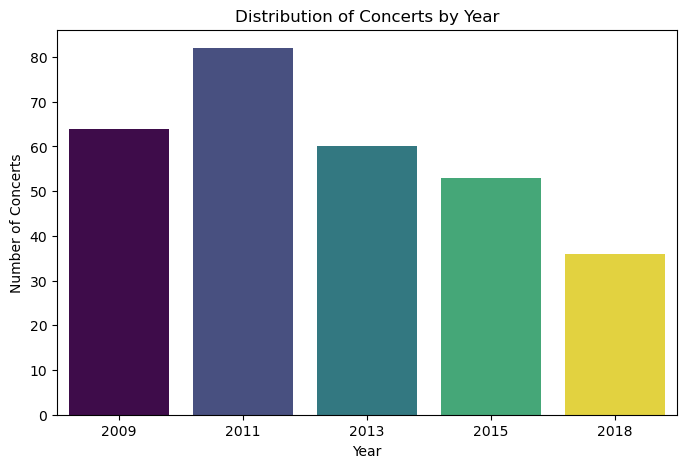

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='tour_year', data=df, hue='tour_year', palette='viridis', legend=False)
plt.title('Distribution of Concerts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Concerts')
plt.show()

In [23]:
most_concerts= df["Country"].value_counts().head(10)

most_concerts_country = df["Country"].value_counts().idxmax()
most_concerts_count = df["Country"].value_counts().max()
print(f"\n3. Country hosting the most Taylor Swift concerts: {most_concerts_country} ({most_concerts_count} concerts)")


3. Country hosting the most Taylor Swift concerts: United States (213 concerts)


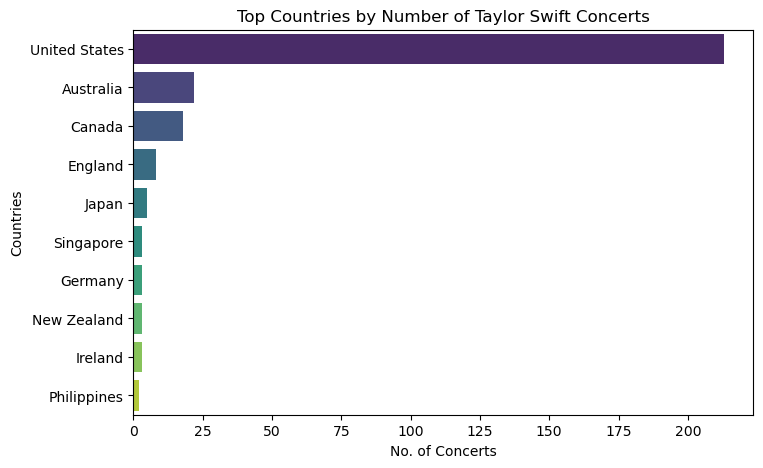

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x=most_concerts.values, y=most_concerts.index, hue= most_concerts.index, palette='viridis')
plt.title('Top Countries by Number of Taylor Swift Concerts')
plt.xlabel('No. of Concerts')
plt.ylabel('Countries')
plt.show()

In [25]:
avg_attendance = df['tickets_sold'].mean()
print(f"\n4. Average attendance across all concerts: {avg_attendance:,.0f} people")

# Median for comparison
median_attendance = df['tickets_sold'].median()
print(f"Median attendance: {median_attendance:,.0f} people")


4. Average attendance across all concerts: 32,302 people
Median attendance: 17,619 people


In [26]:
high_attendance = df['tickets_sold'].max()
print(f"\n5. High attendance across all concerts: {high_attendance:,.0f} people")

high_attendance_row = df[df['tickets_sold'] == high_attendance]
print("\n", high_attendance_row[['City', 'Country', 'Tour', 'tour_year', 'tickets_sold']])


5. High attendance across all concerts: 174,764 people

            City        Country                     Tour  tour_year  \
417  Foxborough  United States  Reputation_Stadium_Tour       2018   

     tickets_sold  
417        174764  



6. Bar chart showing distribution of attendance across all concert tours:


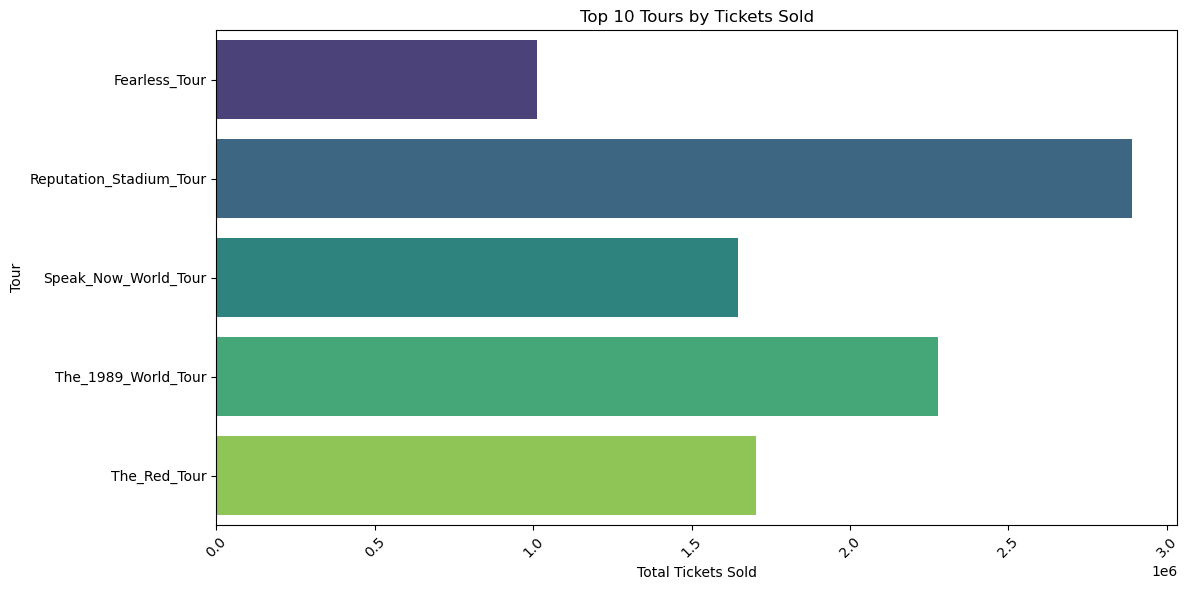

In [27]:
print("\n6. Bar chart showing distribution of attendance across all concert tours:")
tour_tickets = df.groupby("Tour")["tickets_sold"].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=tour_tickets.values, y=tour_tickets.index, hue= tour_tickets.index, palette='viridis')
plt.title('Top 10 Tours by Tickets Sold')
plt.xlabel('Total Tickets Sold')
plt.ylabel('Tour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
corr_att_year= df["tickets_sold"].corr(df["tour_year"])
print("\n7. Correlation between Tour Year and Attendance:",corr_att_year)


7. Correlation between Tour Year and Attendance: 0.6237699766566944


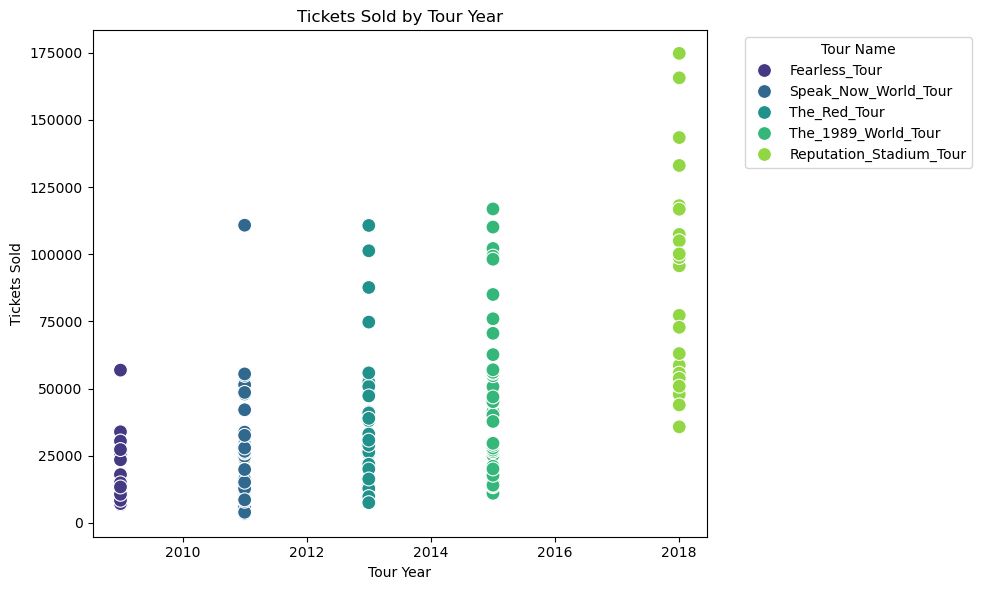

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="tour_year", y="tickets_sold", hue="Tour", palette="viridis", s=100)
plt.title('Tickets Sold by Tour Year')
plt.xlabel('Tour Year')
plt.ylabel('Tickets Sold')
plt.legend(title='Tour Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
city_attend= df.groupby("City")["tickets_sold"].mean().sort_values(ascending=False).head(5)
print("\n8. Top 5 cities with highest average attendance:")
for City, tickets_sold in city_attend.items():
    print(f"{City}: {tickets_sold:,.1f} attendees")


8. Top 5 cities with highest average attendance:
Pasadena: 118,084.0 attendees
Foxborough: 113,998.6 attendees
East Rutherford: 109,386.0 attendees
Santa Clara: 104,844.5 attendees
Landover: 95,672.0 attendees


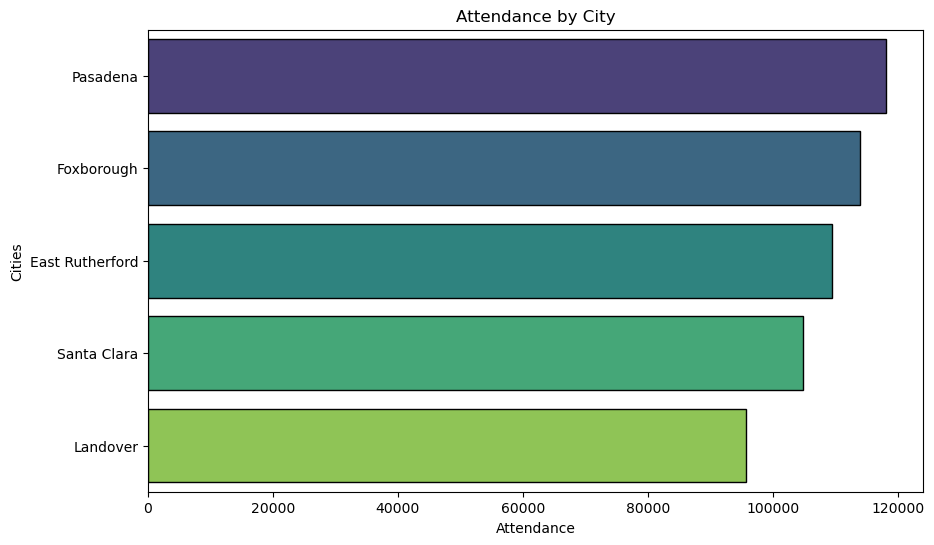

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x= city_attend.values, y= city_attend.index , hue= city_attend.index, palette= "viridis", edgecolor= "Black")
plt.title("Attendance by City")
plt.xlabel("Attendance")
plt.ylabel("Cities")
plt.show()


9. Attendance difference between US and other countries:
Average attendance:
Location
International    31544.597561
US               32593.600939
Name: tickets_sold, dtype: Float64


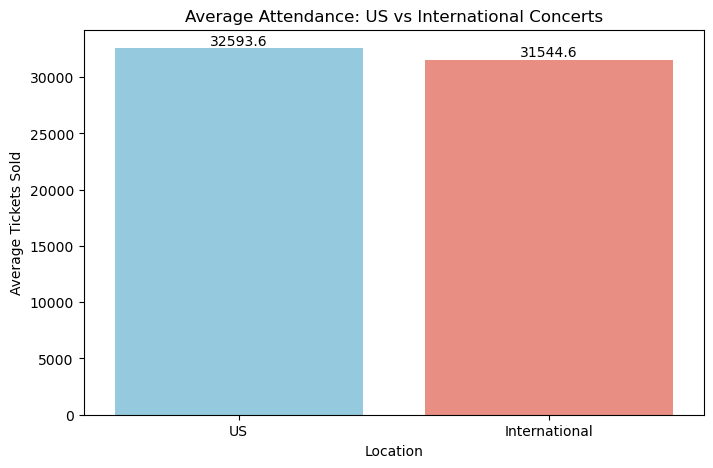

In [32]:
print("\n9. Attendance difference between US and other countries:")

df['Location'] = np.where(df['Country'] == 'United States', 'US', 'International')

avg_attendance = df.groupby('Location')['tickets_sold'].mean()
print("Average attendance:")
print(avg_attendance)

plt.figure(figsize=(8, 5))
ar= sns.barplot(x='Location', y='tickets_sold', data=df, hue='Location',errorbar=None , palette=['skyblue', 'salmon'])
for bar in ar.containers:
    ar.bar_label(bar)

plt.title('Average Attendance: US vs International Concerts')
plt.xlabel('Location')
plt.ylabel('Average Tickets Sold')
plt.show()


10. Attendance trends over the years:


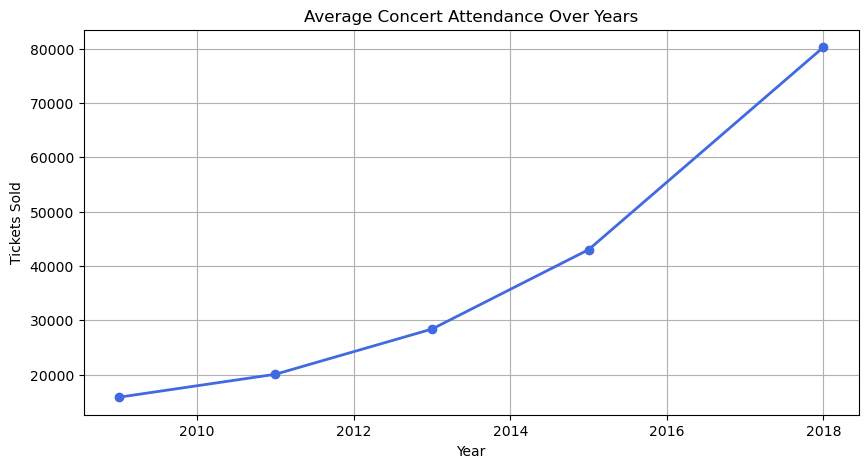

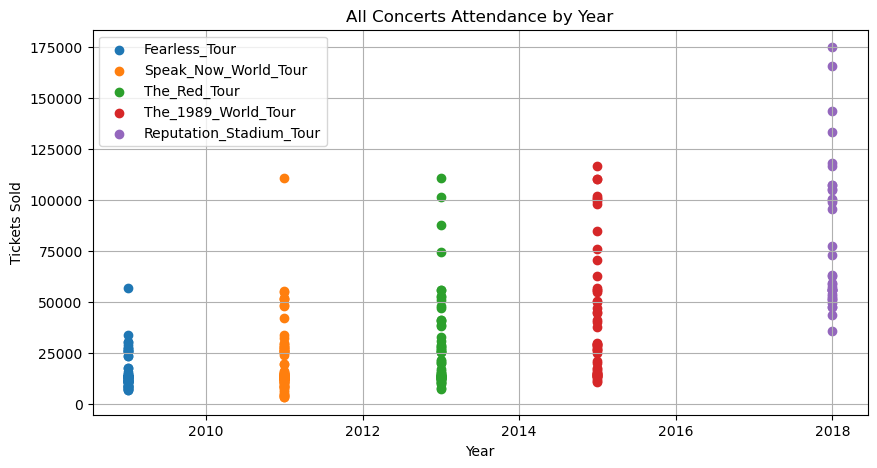

In [33]:
print("\n10. Attendance trends over the years:")
plt.figure(figsize=(10, 5))
df.groupby('tour_year')['tickets_sold'].mean().plot(marker='o', color='royalblue', linewidth=2)
plt.title('Average Concert Attendance Over Years')
plt.xlabel('Year')
plt.ylabel('Tickets Sold')
plt.grid(True)
plt.show()

# Alternative simple version showing all concerts
plt.figure(figsize=(10, 5))
for tour in df['Tour'].unique():
    tour_data = df[df['Tour'] == tour]
    plt.scatter(tour_data['tour_year'], tour_data['tickets_sold'], label=tour)
plt.title('All Concerts Attendance by Year')
plt.xlabel('Year')
plt.ylabel('Tickets Sold')
plt.legend()
plt.grid(True)
plt.show()